# The 20 Newsgroups data set
## Progetto finale di Text Mining
## di Beatrice Fumagalli - matricola 784549 e Matteo Porcino - matricola 748876

### Installazione e import librerie

In [ ]:
! pip install numpy
! pip install pandas
! pip install inflect
! pip install nltk
! pip install contractions
! pip install string
! pip install unicodedata
! pip install matplotlib
! pip install seaborn
! pip install sklearn

#librerie generiche python
import pandas as pd
import numpy as np
import time

#librerie per caricamento file news20
import os
from os import listdir
from os.path import isfile, join


#librerie per pre-processing
import string
import unicodedata
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import *
import re

#librerie per i grafici
import matplotlib.pyplot as plt
import seaborn as sns

#librerie per la Text Representation e Text Classification
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection, linear_model, naive_bayes, svm, ensemble
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#download nltk per tokenization
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
path = os.getcwd() + "\\20_newsgroups"
newsgroups = [f for f in listdir(path)]
newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
#Creazione di una lista per memorizzare i file in cartelle diverse
files = []
for folder_name in newsgroups:
    folder_path = join(path, folder_name)
    files.append([f for f in listdir(folder_path)])

In [5]:
#Creazione di una lista di path di tutti i doc
pathname_list = []
for f in range(len(newsgroups)):
    for ff in files[f]:
        pathname_list.append(join(path, join(newsgroups[f], ff)))

In [6]:
#Creazione di un array contenente le classi a cui appartengono tutti i doc
array = []
for folder_name in newsgroups:
    folder_path = join(path, folder_name)
    num_of_files= len(listdir(folder_path))
    for i in range(num_of_files):
        array.append(folder_name)

In [7]:
#Dividiamo il corpus in Training e Test set
doc_train, doc_test, Y_train, Y_test = train_test_split(pathname_list, array, random_state=0, test_size=0.3)

## Text pre-processing

### • Eliminazione Metadata di ogni news

In [8]:
def remove_metadata(rows):
    for i in range(len(rows)):
        if(rows[i] == '\n'):
            start = i+1
            break
    new_doc_start = rows[start:]
    return new_doc_start

### • Eliminazione contractions

In [9]:
def replace_contractions(rows):
    new_doc = []
    for row in rows:
        new_row = contractions.fix(row)
        new_doc.append(new_row)
    return new_doc

### • Rimozione URL e indirizzi e-mail

In [10]:
def remove_url_mail(rows):
    new_doc = []
    for row in rows:
        new_row = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', row)
        new_row = re.sub(r'[\w\.-]+@[\w\.-]+', '', new_row)
        new_doc.append(new_row)    
    return new_doc

### • Rimozione righe vuote e tabs

In [11]:
def remove_tabs(tokens):
    table= str.maketrans('','','\t\n\r')
    new = [token.translate(table) for token in tokens]
    return new

### • Eliminazione caratteri non unicode

In [12]:
def remove_non_unicode(tokens):
    new_tokens = []
    for token in tokens:
        new_token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_tokens.append(new_token)
    return new_tokens

### • Eliminazione punteggiatura

In [13]:
def remove_punctuation(tokens):
    table= str.maketrans('','', string.punctuation)
    new = [token.translate(table) for token in tokens]
    new = [str for str in new if str]
    return new

### • Text stemming e lemmatization

In [14]:
 def stem_and_lem(tokens):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed = [stemmer.stem(token) for token in tokens]
    lemmatized = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    return stemmed,lemmatized

### • Funzione per il pre-processing di ogni singolo documento

In [15]:
def text_preprocessing(documents_path): 
    #leggere il documento
    doc = open(documents_path, 'r')
    doc_rows = doc.readlines()
    #print('*******************************INITIAL DOC***********************************')
    #print(doc_rows)
    
    #Rimozione Metadata
    doc_rows = remove_metadata(doc_rows)
    #print('\n*******************************NO META DOC***********************************')
    #print (doc_rows)
    
    #Rimozione Contractions
    doc_rows = replace_contractions(doc_rows)
    #print('\n*******************************NO CONTRACTIONS***********************************')
    #print (new_doc)
    
    #Rimozione di URL e indirizzi E-mail
    doc_rows = remove_url_mail(doc_rows)
    
    #per utilizzare la libreria nltk creiamo un'unica stringa contenente l'intero doc
    new_doc = ' '.join(doc_rows)
    #print('\n******************************* STRING ***********************************')
    #print (new_doc)
    
    #tokenizzazione
    doc_tokenized = word_tokenize(new_doc)
    #print('\n******************************* TOK ***********************************')
    #print (doc_tokenized)
    
    #Rimozione caratteri non unicode
    doc_tokenized = remove_non_unicode(doc_tokenized)
    #print('\n******************************* NO UNICODE ***********************************')
    #print (doc_tokenized)
    
    #Rimozione tabs e spazi
    doc_tokenized = remove_tabs(doc_tokenized)
    #print('\n******************************* NO TABS ***********************************')
    #print (doc_tokenized)
    
    #Rimozione punteggiatura ed eventuali ulteriori spazi
    doc_tokenized = remove_punctuation(doc_tokenized)
    #print('\n*******************************NO PUNT ***********************************')
    #print (doc_tokenized)
    
    #Eliminazione stringhe numeriche
    doc_tokenized = [token for token in doc_tokenized if not token.isdigit()]
    #print('\n*******************************NO NUM ***********************************')
    #print (doc_tokenized)
    
    #Normalizzazione caratteri in minuscolo
    doc_tokenized = [token.lower() for token in doc_tokenized]
    #print('\n*******************************NORM ***********************************')
    #print (doc_tokenized)
    
    #Rimozione delle stop-words
    stop_words = set(stopwords.words('english'))
    doc_tokenized = [token for token in doc_tokenized if not token in stop_words]
    #print('\n*******************************STOP WORDS ***********************************')
    #print (doc_tokenized)
    
    #Eliminazione token di lunghezza inferiore a 2
    doc_tokenized = [token for token in doc_tokenized if len(token) > 1]
    #print('\n*******************************NO 2 ***********************************')
    #print (doc_tokenized)
    
    
    return doc_tokenized

### Applicazione della funzione di pre-processing al Training set

In [16]:
train_corpus_stem = []
train_corpus_lem = []
for doc in doc_train:
    stem, lem = stem_and_lem(text_preprocessing(doc))
    train_corpus_stem.append(stem)
    train_corpus_lem.append(lem)

In [17]:
train_corpus_flat_stem = []
for doc in train_corpus_stem:
    for i in doc:
        train_corpus_flat_stem.append(i)

In [18]:
len(train_corpus_flat_stem)

1938220

### Applicazione della funzione di pre-processing al Test set

In [19]:
test_corpus_stem = []
test_corpus_lem = []
for doc in doc_test:
    stem, lem = stem_and_lem(text_preprocessing(doc))
    test_corpus_stem.append(stem)
    test_corpus_lem.append(lem)

In [20]:
test_corpus_flat_stem = []
for doc in test_corpus_stem:
    for i in doc:
        test_corpus_flat_stem.append(i)

In [21]:
len(test_corpus_flat_stem)

850695

### Calcolo della Document Term Matrix (DTM)

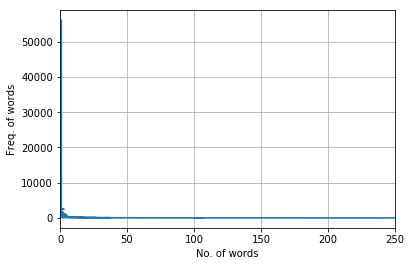

In [22]:
words, counts = np.unique(train_corpus_flat_stem, return_counts=True)
freq, wrds = (list(i) for i in zip(*(sorted(zip(counts, words), reverse=True))))

f_o_w = []
n_o_w = []
for f in sorted(np.unique(freq), reverse=True):
    f_o_w.append(f)
    n_o_w.append(freq.count(f))
    
y = f_o_w
x = n_o_w
plt.xlim(0,250)
plt.xlabel("No. of words")
plt.ylabel("Freq. of words")
plt.plot(x, y)
plt.grid()
plt.show()

In [23]:
def do_nothing(doc):
    return doc

## Text Representation

### • Count Vector/TF Representation

In [24]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = do_nothing, preprocessor = do_nothing, token_pattern=None) 
TF_train = vectorizer.fit_transform(train_corpus_stem)
print(TF_train.shape)
print(len(Y_train))

(13997, 120279)
13997


In [25]:
#vectorizer = CountVectorizer(analyzer = "word", tokenizer = do_nothing, preprocessor = do_nothing, token_pattern=None) 
TF_test = vectorizer.fit_transform(test_corpus_stem)
print(TF_test.shape)
print(len(Y_test))

(6000, 62337)
6000


### • TF/IDF

In [26]:
TF_IDF_vectorizer = TfidfVectorizer(analyzer = "word", tokenizer = do_nothing, preprocessor = do_nothing, token_pattern=None) 
TF_IDF_train = TF_IDF_vectorizer.fit_transform(train_corpus_stem)
print(TF_IDF_train.shape)

(13997, 120279)


In [27]:
#TF_IDF_vectorizer = TfidfVectorizer(analyzer = "word", tokenizer = do_nothing, preprocessor = do_nothing, token_pattern=None) 
TF_IDF_test = TF_IDF_vectorizer.fit_transform(test_corpus_stem)
print(TF_IDF_test.shape)

(6000, 62337)


## Text Classification

### • Multinomial Naive Bayes (TF)


In [28]:
start = time.time()
text_mnb = Pipeline([('vect', vectorizer),
                    ('mnb', naive_bayes.MultinomialNB(alpha=0.005))])
text_mnb = text_mnb.fit(train_corpus_stem, Y_train)
end = time.time()
predicted_mnb = text_mnb.predict(test_corpus_stem)

In [29]:
np.mean(predicted_mnb == Y_test)
print("Accuracy: " + str(text_mnb.score(test_corpus_stem, Y_test)) + ", Time duration: " + str(end - start))

Accuracy: 0.813, Time duration: 1.2933359146118164


In [30]:
print(classification_report(Y_test, predicted_mnb))

                          precision    recall  f1-score   support

             alt.atheism       0.65      0.75      0.70       274
           comp.graphics       0.68      0.84      0.75       301
 comp.os.ms-windows.misc       0.91      0.14      0.24       308
comp.sys.ibm.pc.hardware       0.57      0.86      0.68       284
   comp.sys.mac.hardware       0.78      0.89      0.83       297
          comp.windows.x       0.79      0.84      0.81       295
            misc.forsale       0.86      0.69      0.77       306
               rec.autos       0.90      0.88      0.89       320
         rec.motorcycles       0.91      0.96      0.93       324
      rec.sport.baseball       0.96      0.94      0.95       309
        rec.sport.hockey       0.96      0.97      0.96       274
               sci.crypt       0.92      0.92      0.92       278
         sci.electronics       0.84      0.83      0.83       307
                 sci.med       0.93      0.92      0.92       297
         

### • Linear Classifier (TF)


In [31]:
start = time.time()
text_lc = Pipeline([('vect', vectorizer),
                    ('lc', linear_model.LogisticRegression())])
text_lc = text_lc.fit(train_corpus_stem, Y_train)
end = time.time()
predicted_lc = text_lc.predict(test_corpus_stem)

In [32]:
np.mean(predicted_lc == Y_test)
print("Accuracy: " + str(text_lc.score(test_corpus_stem, Y_test)) + ", Time duration: " + str(end - start))

Accuracy: 0.808833333333, Time duration: 51.75773811340332


                          precision    recall  f1-score   support

             alt.atheism       0.66      0.68      0.67       274
           comp.graphics       0.73      0.77      0.75       301
 comp.os.ms-windows.misc       0.77      0.77      0.77       308
comp.sys.ibm.pc.hardware       0.72      0.75      0.73       284
   comp.sys.mac.hardware       0.83      0.81      0.82       297
          comp.windows.x       0.81      0.83      0.82       295
            misc.forsale       0.72      0.83      0.77       306
               rec.autos       0.88      0.84      0.86       320
         rec.motorcycles       0.94      0.92      0.93       324
      rec.sport.baseball       0.94      0.91      0.92       309
        rec.sport.hockey       0.96      0.96      0.96       274
               sci.crypt       0.93      0.91      0.92       278
         sci.electronics       0.81      0.79      0.80       307
                 sci.med       0.89      0.90      0.90       297
         

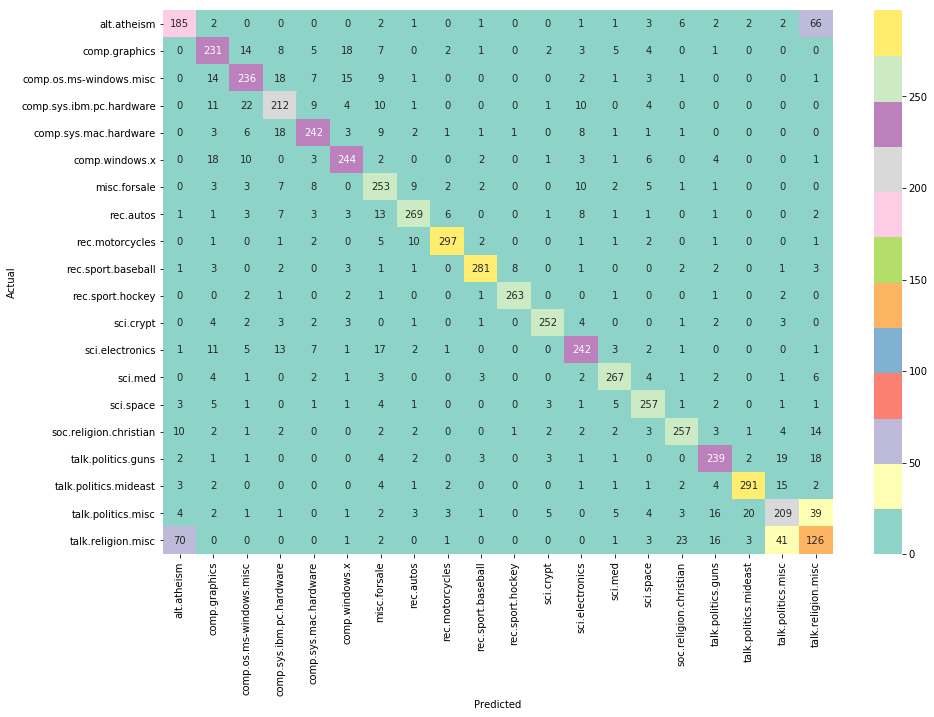

In [33]:
print(classification_report(Y_test, predicted_lc))
confusion_lc_tf = confusion_matrix(Y_test, predicted_lc)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_lc_tf, annot=True, cmap = "Set3", fmt ="d",
xticklabels=newsgroups, yticklabels=newsgroups)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### • Random Forest (TF)

In [34]:
start = time.time()
text_rf = Pipeline([('vect', vectorizer),
                    ('rf', ensemble.RandomForestClassifier())])
text_rf = text_rf.fit(train_corpus_stem, Y_train)
end = time.time()
predicted_rf = text_rf.predict(test_corpus_stem)

In [35]:
np.mean(predicted_rf == Y_test)
print("Accuracy: " + str(text_rf.score(test_corpus_stem, Y_test)) + ", Time duration: " + str(end - start))

Accuracy: 0.6145, Time duration: 38.76791524887085


In [36]:
print(classification_report(Y_test, predicted_rf))

                          precision    recall  f1-score   support

             alt.atheism       0.39      0.54      0.45       274
           comp.graphics       0.44      0.62      0.52       301
 comp.os.ms-windows.misc       0.46      0.62      0.53       308
comp.sys.ibm.pc.hardware       0.44      0.48      0.45       284
   comp.sys.mac.hardware       0.63      0.63      0.63       297
          comp.windows.x       0.61      0.62      0.61       295
            misc.forsale       0.57      0.68      0.62       306
               rec.autos       0.68      0.67      0.68       320
         rec.motorcycles       0.78      0.81      0.80       324
      rec.sport.baseball       0.74      0.72      0.73       309
        rec.sport.hockey       0.72      0.83      0.77       274
               sci.crypt       0.78      0.79      0.78       278
         sci.electronics       0.64      0.37      0.47       307
                 sci.med       0.78      0.66      0.71       297
         

### • Support Vector Machine (TF)

In [37]:
start = time.time()
text_svm = Pipeline([('vect', vectorizer),
                    ('svm', svm.LinearSVC(C=10))])
text_svm = text_svm.fit(train_corpus_stem, Y_train)
end = time.time()
predicted_svm = text_svm.predict(test_corpus_stem)

In [38]:
np.mean(predicted_svm == Y_test)
print("Accuracy: " + str(text_svm.score(test_corpus_stem, Y_test)) + ", Time duration: " + str(end - start))

Accuracy: 0.754, Time duration: 15.46279001235962


In [39]:
print(classification_report(Y_test, predicted_svm))

                          precision    recall  f1-score   support

             alt.atheism       0.60      0.64      0.62       274
           comp.graphics       0.73      0.72      0.73       301
 comp.os.ms-windows.misc       0.68      0.73      0.71       308
comp.sys.ibm.pc.hardware       0.64      0.68      0.66       284
   comp.sys.mac.hardware       0.77      0.78      0.78       297
          comp.windows.x       0.82      0.80      0.81       295
            misc.forsale       0.68      0.74      0.71       306
               rec.autos       0.85      0.79      0.82       320
         rec.motorcycles       0.90      0.89      0.89       324
      rec.sport.baseball       0.91      0.87      0.89       309
        rec.sport.hockey       0.84      0.91      0.87       274
               sci.crypt       0.84      0.85      0.85       278
         sci.electronics       0.72      0.72      0.72       307
                 sci.med       0.84      0.87      0.85       297
         

### • Multinomial Naive Bayes (TF-IDF)


In [40]:
start = time.time()
text_mnb_Tfidf = Pipeline([('vect', TF_IDF_vectorizer),
                    ('mnb', naive_bayes.MultinomialNB(alpha=0.005))])
text_mnb_Tfidf = text_mnb_Tfidf.fit(train_corpus_stem, Y_train)
end = time.time()
predicted_mnb_Tfidf = text_mnb_Tfidf.predict(test_corpus_stem)

In [41]:
np.mean(predicted_mnb_Tfidf == Y_test)
print("Accuracy: " + str(text_mnb_Tfidf.score(test_corpus_stem, Y_test)) + ", Time duration: " + str(end - start))

Accuracy: 0.848, Time duration: 1.346592664718628


                          precision    recall  f1-score   support

             alt.atheism       0.67      0.72      0.69       274
           comp.graphics       0.79      0.80      0.79       301
 comp.os.ms-windows.misc       0.84      0.77      0.80       308
comp.sys.ibm.pc.hardware       0.72      0.85      0.78       284
   comp.sys.mac.hardware       0.86      0.88      0.87       297
          comp.windows.x       0.88      0.89      0.89       295
            misc.forsale       0.88      0.69      0.77       306
               rec.autos       0.91      0.89      0.90       320
         rec.motorcycles       0.95      0.96      0.95       324
      rec.sport.baseball       0.97      0.95      0.96       309
        rec.sport.hockey       0.95      0.98      0.97       274
               sci.crypt       0.93      0.94      0.93       278
         sci.electronics       0.86      0.86      0.86       307
                 sci.med       0.93      0.92      0.93       297
         

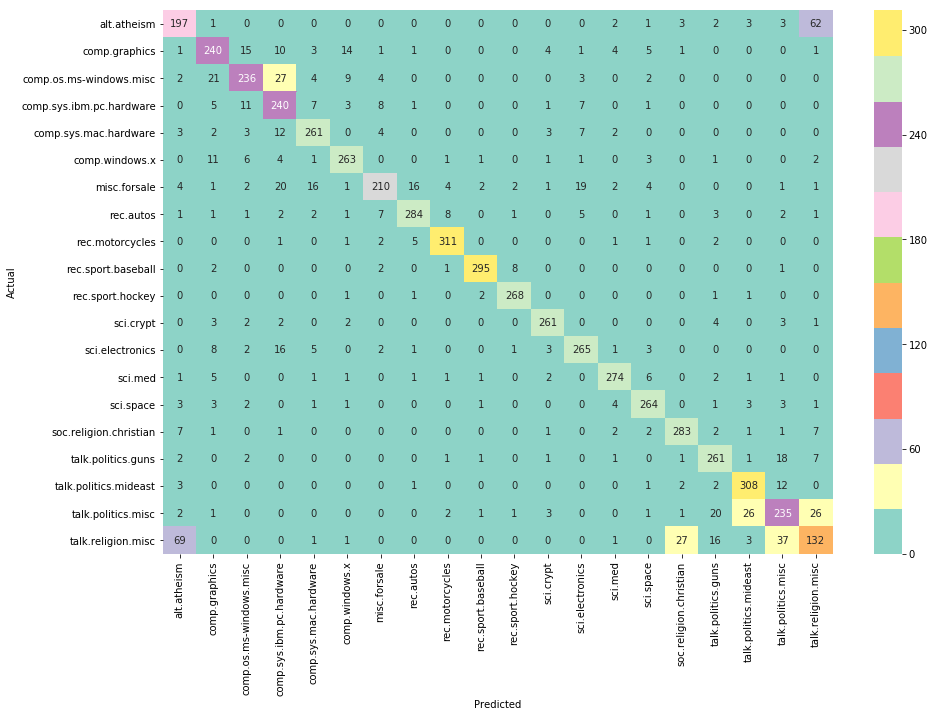

In [42]:
print(classification_report(Y_test, predicted_mnb_Tfidf))
confusion_nb_tfidf = confusion_matrix(Y_test, predicted_mnb_Tfidf)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_nb_tfidf, annot=True, cmap = "Set3", fmt ="d",
xticklabels=newsgroups, yticklabels=newsgroups)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### • Linear Classifier (TF-IDF)

In [43]:
start = time.time()
text_lc_Tfidf = Pipeline([('vect', TF_IDF_vectorizer),
                    ('lc', linear_model.LogisticRegression())])
text_lc_Tfidf = text_lc_Tfidf.fit(train_corpus_stem, Y_train)
end = time.time()
predicted_lc_Tfidf = text_lc_Tfidf.predict(test_corpus_stem)

In [44]:
np.mean(predicted_lc_Tfidf == Y_test)
print("Accuracy: " + str(text_lc_Tfidf.score(test_corpus_stem, Y_test)) + ", Time duration: " + str(end - start))

Accuracy: 0.823833333333, Time duration: 6.540441036224365


In [45]:
print(classification_report(Y_test, predicted_lc_Tfidf))

                          precision    recall  f1-score   support

             alt.atheism       0.69      0.70      0.69       274
           comp.graphics       0.76      0.77      0.77       301
 comp.os.ms-windows.misc       0.77      0.77      0.77       308
comp.sys.ibm.pc.hardware       0.73      0.73      0.73       284
   comp.sys.mac.hardware       0.84      0.81      0.83       297
          comp.windows.x       0.83      0.83      0.83       295
            misc.forsale       0.74      0.83      0.78       306
               rec.autos       0.91      0.86      0.88       320
         rec.motorcycles       0.95      0.93      0.94       324
      rec.sport.baseball       0.97      0.94      0.95       309
        rec.sport.hockey       0.97      0.97      0.97       274
               sci.crypt       0.95      0.90      0.92       278
         sci.electronics       0.76      0.81      0.79       307
                 sci.med       0.88      0.93      0.90       297
         

### • Random Forest (TF-IDF)

In [46]:
start = time.time()
text_rf_Tfidf = Pipeline([('vect', TF_IDF_vectorizer),
                    ('rf', ensemble.RandomForestClassifier())])
text_rf_Tfidf = text_rf_Tfidf.fit(train_corpus_stem, Y_train)
end = time.time()
predicted_rf_Tfidf = text_rf_Tfidf.predict(test_corpus_stem)

In [47]:
np.mean(predicted_rf_Tfidf == Y_test)
print("Accuracy: " + str(text_rf_Tfidf.score(test_corpus_stem, Y_test)) + ", Time duration: " + str(end - start))

Accuracy: 0.6165, Time duration: 37.00268483161926


In [48]:
print(classification_report(Y_test, predicted_rf_Tfidf))

                          precision    recall  f1-score   support

             alt.atheism       0.40      0.51      0.45       274
           comp.graphics       0.41      0.55      0.47       301
 comp.os.ms-windows.misc       0.50      0.69      0.58       308
comp.sys.ibm.pc.hardware       0.49      0.53      0.51       284
   comp.sys.mac.hardware       0.58      0.63      0.60       297
          comp.windows.x       0.67      0.56      0.61       295
            misc.forsale       0.52      0.66      0.58       306
               rec.autos       0.61      0.64      0.63       320
         rec.motorcycles       0.84      0.80      0.82       324
      rec.sport.baseball       0.75      0.72      0.74       309
        rec.sport.hockey       0.74      0.85      0.79       274
               sci.crypt       0.82      0.81      0.81       278
         sci.electronics       0.58      0.35      0.44       307
                 sci.med       0.78      0.66      0.71       297
         

### • Support Vector Machine (TF-IDF)

In [49]:
start = time.time()
text_svm_Tfidf = Pipeline([('vect', TF_IDF_vectorizer),
                    ('svm', svm.LinearSVC(C=10))])
text_svm_Tfidf = text_svm_Tfidf.fit(train_corpus_stem, Y_train)
predicted_svm_Tfidf = text_svm_Tfidf.predict(test_corpus_stem)
end = time.time()

In [50]:
np.mean(predicted_svm_Tfidf == Y_test)
print("Accuracy: " + str(text_svm_Tfidf.score(test_corpus_stem, Y_test)) + ", Time duration: " + str(end - start))

Accuracy: 0.840666666667, Time duration: 8.094698429107666


                          precision    recall  f1-score   support

             alt.atheism       0.70      0.71      0.70       274
           comp.graphics       0.82      0.80      0.81       301
 comp.os.ms-windows.misc       0.80      0.81      0.80       308
comp.sys.ibm.pc.hardware       0.74      0.79      0.76       284
   comp.sys.mac.hardware       0.86      0.87      0.87       297
          comp.windows.x       0.86      0.87      0.87       295
            misc.forsale       0.77      0.81      0.79       306
               rec.autos       0.91      0.86      0.88       320
         rec.motorcycles       0.95      0.95      0.95       324
      rec.sport.baseball       0.97      0.94      0.96       309
        rec.sport.hockey       0.96      0.97      0.96       274
               sci.crypt       0.94      0.94      0.94       278
         sci.electronics       0.82      0.83      0.82       307
                 sci.med       0.92      0.92      0.92       297
         

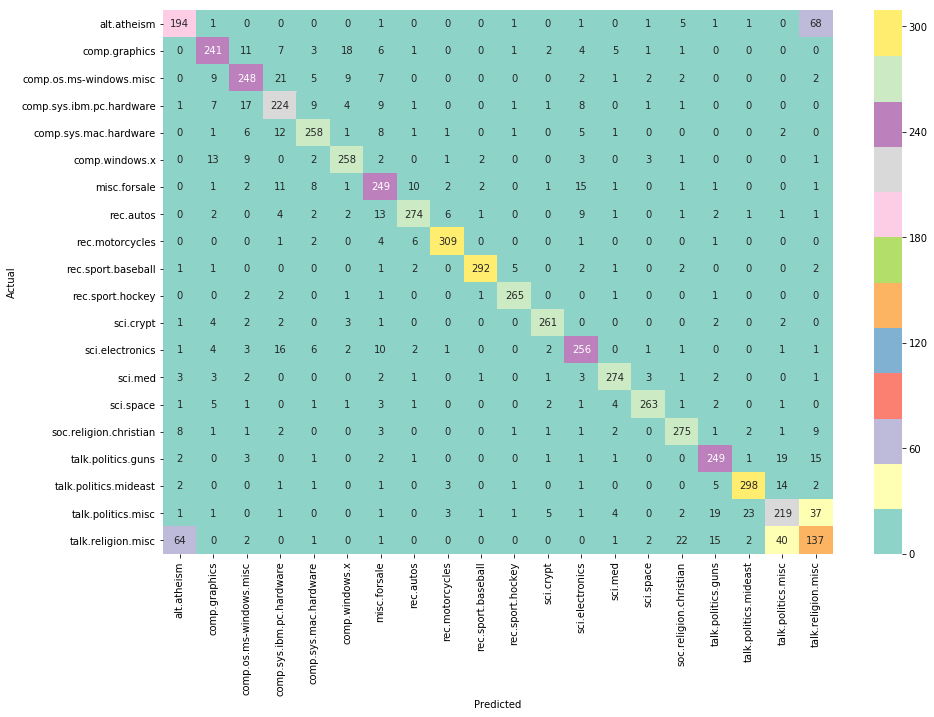

In [51]:
print(classification_report(Y_test, predicted_svm_Tfidf))
confusion_svm_tfidf = confusion_matrix(Y_test, predicted_svm_Tfidf)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(confusion_svm_tfidf, annot=True, cmap = "Set3", fmt ="d",
xticklabels=newsgroups, yticklabels=newsgroups)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()